## Phase 2
Dataset Visualization


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


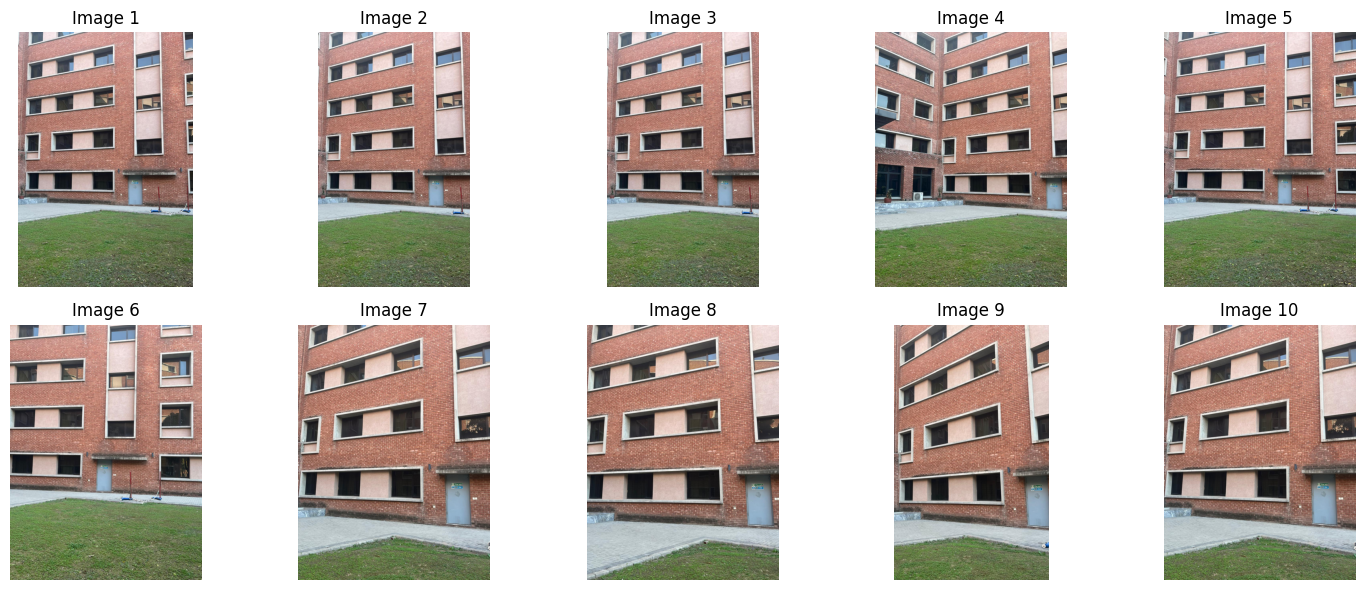

In [1]:
import cv2
# !pip install "numpy<2"
# !pip install --upgrade matplotlib
import numpy as np
import open3d as o3d 
import os 
import matplotlib.pyplot as plt
from sfm import show_images



img_folder = 'web/images'
show_images(img_folder)

### Running SFM Pipeline from sfm.py

Initial images triangulated with 2686 points.
Adding image 3/40
Added 7206 new points.
Saved: cloud_3.png


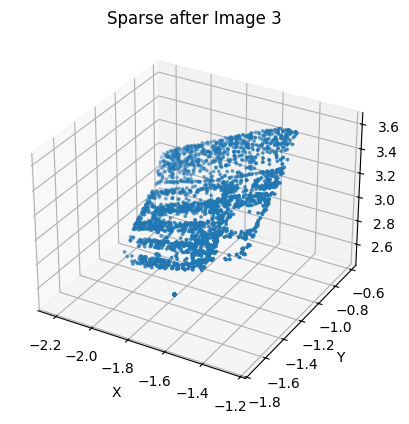

Adding image 4/40
Added 2392 new points.
Saved: cloud_4.png


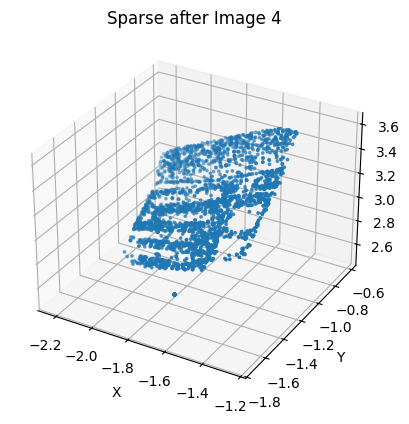

Adding image 5/40
Added 2243 new points.
Saved: cloud_5.png


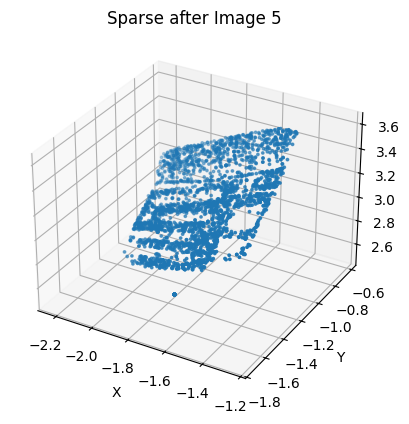

Adding image 6/40
Added 1818 new points.
Saved: cloud_6.png


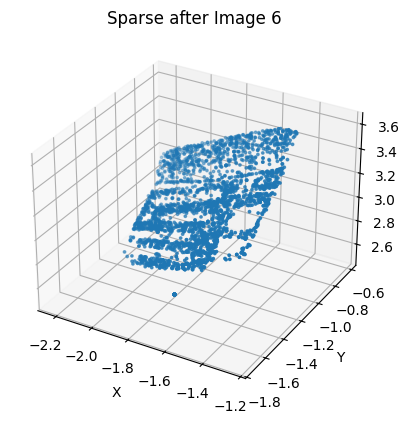

Adding image 7/40
Added 1165 new points.
Saved: cloud_7.png


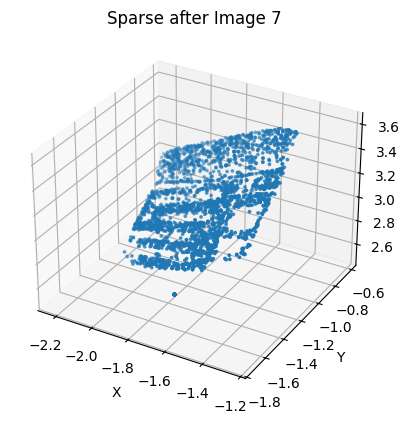

Adding image 8/40
PnP failed.
Localized failed so skip image
Adding image 9/40
PnP failed.
Localized failed so skip image
Adding image 10/40
PnP failed.
Localized failed so skip image
Adding image 11/40
PnP failed.
Localized failed so skip image
Adding image 12/40
Added 2615 new points.
Saved: cloud_12.png


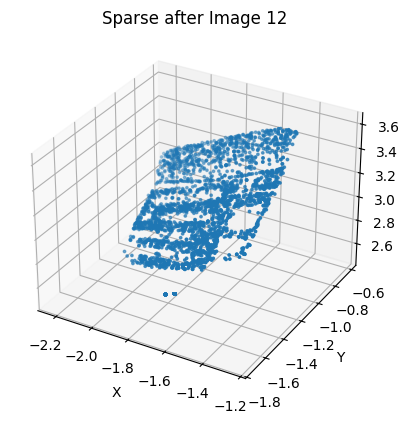

Adding image 13/40
Added 2202 new points.
Saved: cloud_13.png


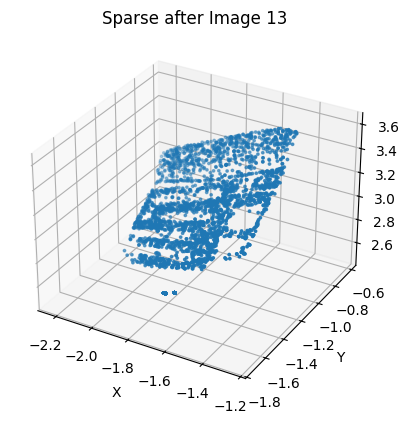

Adding image 14/40
Added 2068 new points.
Saved: cloud_14.png


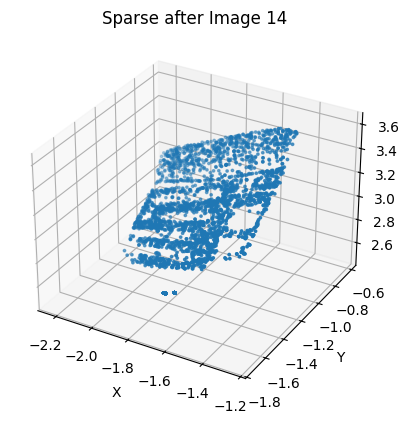

Adding image 15/40
Added 2825 new points.
Saved: cloud_15.png


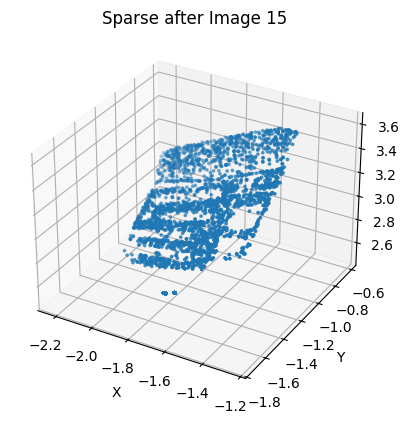

Adding image 16/40
PnP failed.
Localized failed so skip image
Adding image 17/40
Added 1313 new points.
Saved: cloud_17.png


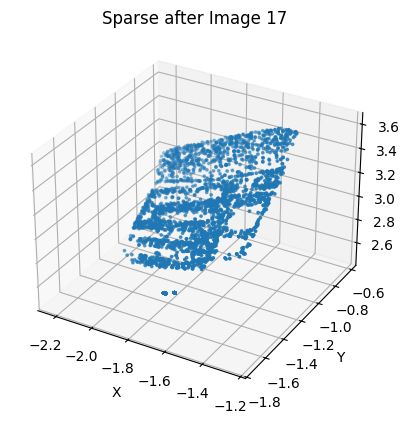

Adding image 18/40
PnP failed.
Localized failed so skip image
Adding image 19/40
PnP failed.
Localized failed so skip image
Adding image 20/40
PnP failed.
Localized failed so skip image
Adding image 21/40
PnP failed.
Localized failed so skip image
Adding image 22/40
PnP failed.
Localized failed so skip image
Adding image 23/40
PnP failed.
Localized failed so skip image
Adding image 24/40
PnP failed.
Localized failed so skip image
Adding image 25/40
PnP failed.
Localized failed so skip image
Adding image 26/40
PnP failed.
Localized failed so skip image
Adding image 27/40
PnP failed.
Localized failed so skip image
Adding image 28/40
Added 161 new points.
Saved: cloud_28.png


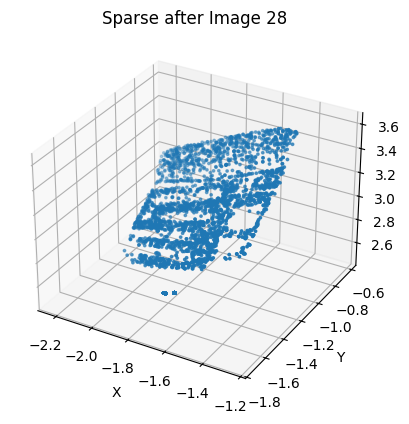

Adding image 29/40
PnP failed.
Localized failed so skip image
Adding image 30/40
Added 2451 new points.
Saved: cloud_30.png


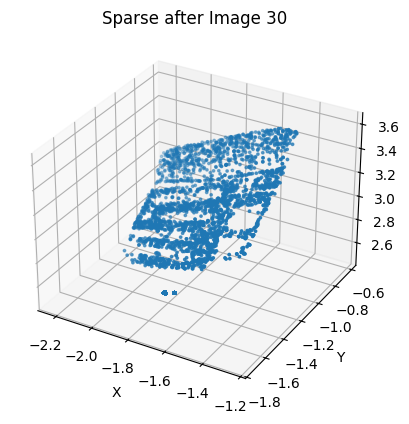

Adding image 31/40
Added 1488 new points.
Saved: cloud_31.png


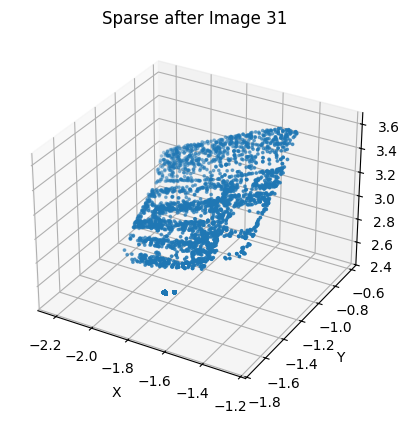

Adding image 32/40
Added 2646 new points.
Saved: cloud_32.png


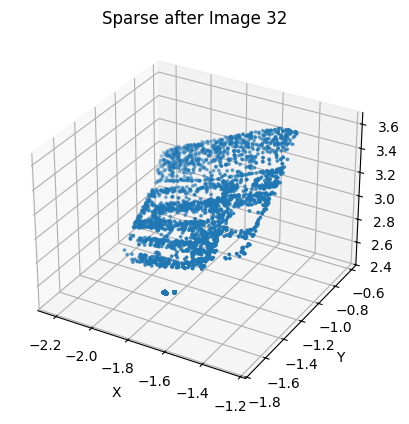

Adding image 33/40
Added 1732 new points.
Saved: cloud_33.png


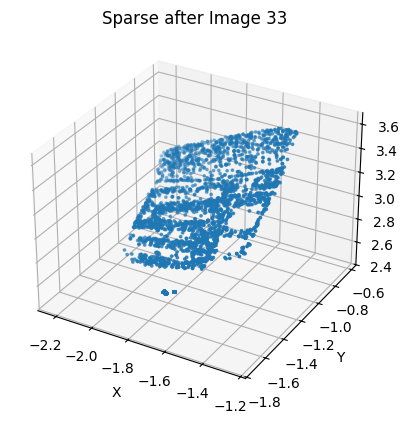

Adding image 34/40
Added 653 new points.
Saved: cloud_34.png


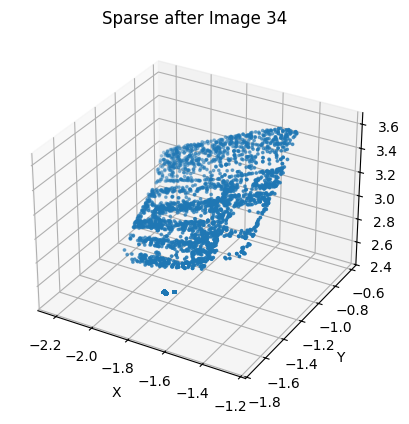

Adding image 35/40
PnP failed.
Localized failed so skip image
Adding image 36/40
PnP failed.
Localized failed so skip image
Adding image 37/40
PnP failed.
Localized failed so skip image
Adding image 38/40
Added 1545 new points.
Saved: cloud_38.png


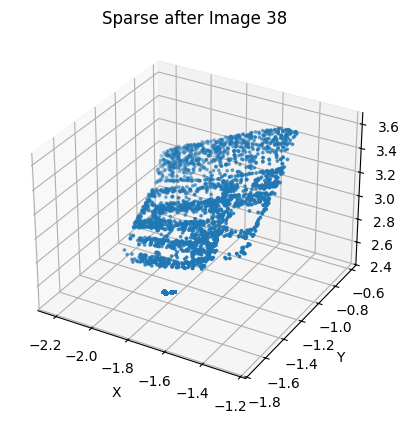

Adding image 39/40
PnP failed.
Localized failed so skip image
Adding image 40/40
Added 812 new points.
Saved: cloud_40.png


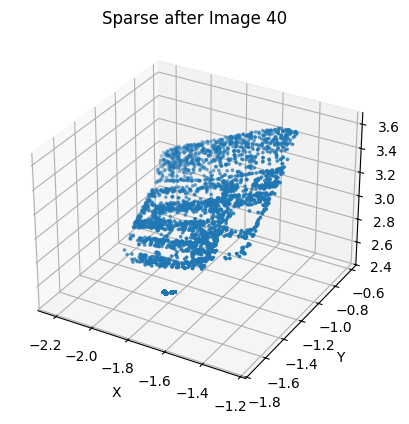


DONE :)
Total 3D points: 40021


In [2]:
from sfm import run_incremental_sfm, total_points3d, plot_orthographic_views,visualize_sparse_cloud

#intrinsics for my camera
fx = 1994
fy = 3550
cx = 1500
cy = 2000
K= np.array([[fx,0,cx],[0,fy,cy],[0,0,1]], dtype=np.float64)

run_incremental_sfm("web/images", K)


## Final Cloud + Views

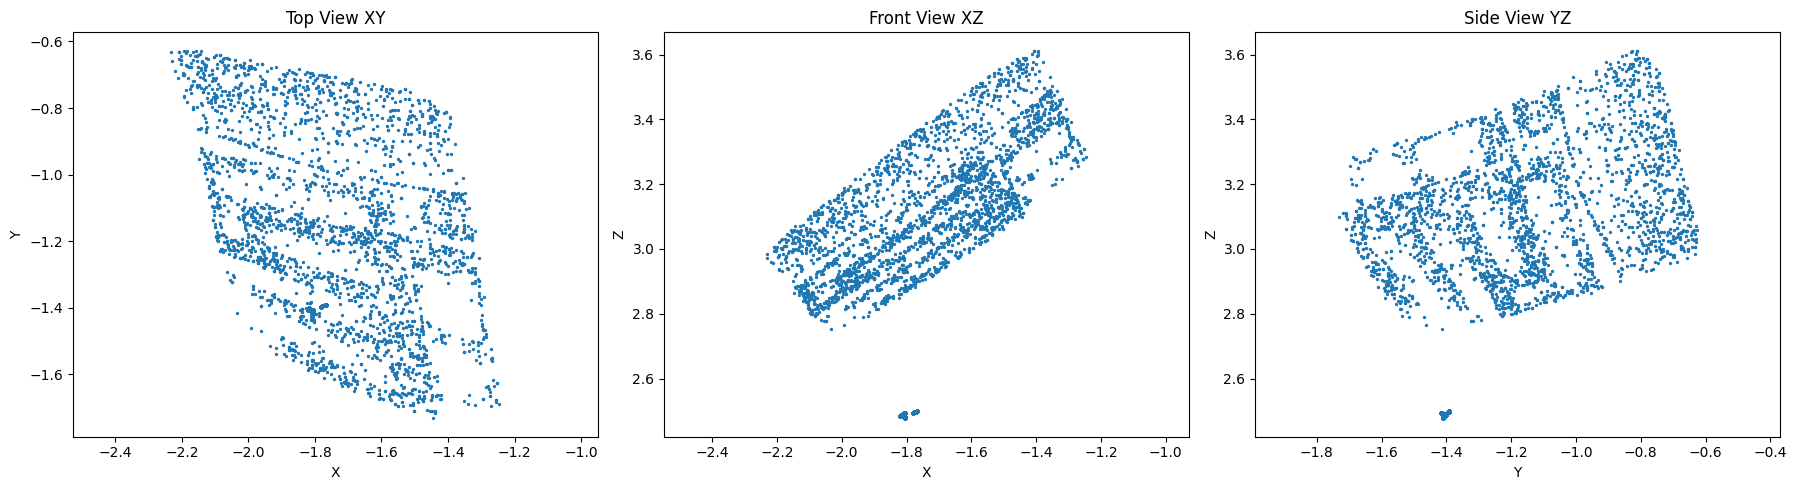

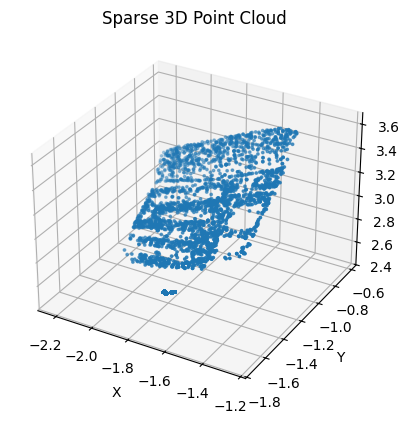

In [3]:
   
plot_orthographic_views(total_points3d)
visualize_sparse_cloud(total_points3d)

### Coloured Open3d Visualisation
##### uncomment to load for checking only

In [5]:
# def colorize_point_cloud(points_3d, image_path, K, R=np.eye(3), t=np.zeros((3,1))):
#     img = cv2.imread(image_path)
#     H, W, _ = img.shape
#     colors = []
#     for X in points_3d:
#         X = np.array(X).reshape(3,1)
#         x_cam = R @ X + t
#         if x_cam[2] <= 0:
#             colors.append([1,1,1])
#             continue

#         x_img = K @ x_cam
#         u = int(x_img[0]/x_img[2])
#         v = int(x_img[1]/x_img[2])
#         if 0 <= u < W and 0 <= v < H:
#             b,g,r = img[v,u]
#             colors.append([r/255, g/255, b/255])
#         else:
#             colors.append([1,1,1])

#     return np.array(colors)

# def save_and_visualize_colored_ply(filename, points, colors):
#     points = np.asarray(points, dtype=np.float64)
#     colors = np.asarray(colors, dtype=np.float64)
#     pcd = o3d.geometry.PointCloud()
#     pcd.points = o3d.utility.Vector3dVector(points)
#     pcd.colors = o3d.utility.Vector3dVector(colors)
#     o3d.io.write_point_cloud(filename, pcd)
#     print(f"Saved colored point cloud to {filename}")
#     pcd_loaded = o3d.io.read_point_cloud(filename)
#     o3d.visualization.draw_geometries([pcd_loaded])


# X = np.array(total_points3d)
# first_image_path = "lums\light\IMG-20251201-WA0034.jpg"
# colors = colorize_point_cloud(X, first_image_path, K)
# save_and_visualize_colored_ply("colored_sfm.ply", X, colors)
